In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\ass.13 KNN\Zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<AxesSubplot:>

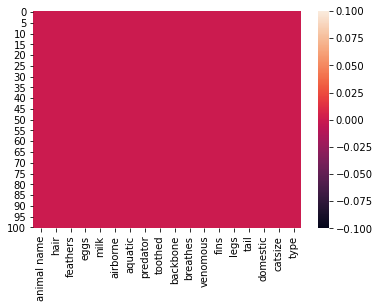

In [4]:
sns.heatmap(df.isnull())

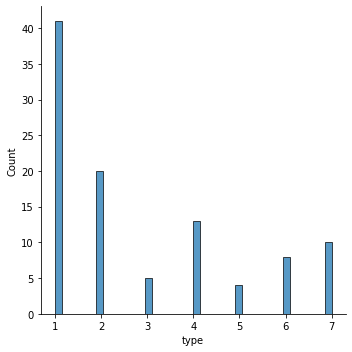

In [5]:
sns.displot(df['type'].dropna(),bins=40)

In [6]:
df=df.drop('animal name',axis=1)

In [7]:
X = df.drop('type',axis=1)
y = df['type']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [10]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
model.score(X_test,y_test)

0.9354838709677419

In [12]:
pre = model.predict(X_test)
pre

array([2, 1, 1, 2, 2, 4, 2, 6, 4, 1, 1, 2, 2, 2, 1, 1, 7, 7, 5, 6, 2, 1,
       4, 2, 1, 1, 2, 2, 4, 7, 1], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.91      0.95        11
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.75      1.00      0.86         3

    accuracy                           0.94        31
   macro avg       0.82      0.77      0.78        31
weighted avg       0.98      0.94      0.95        31



C:\Users\91832\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Choosing a K value

In [14]:
accuracy_rate=[]

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

C:\Users\91832\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91832\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91832\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91832\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91832\anaconda3\lib\site-packag

Text(0, 0.5, 'accuacy rate')

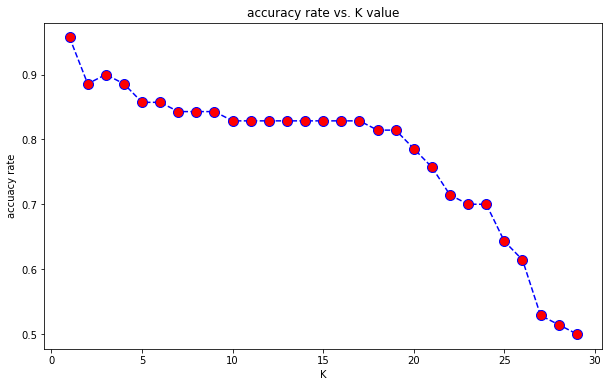

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy rate vs. K value')
plt.xlabel('K')
plt.ylabel('accuacy rate')

In [16]:
knn = KNeighborsClassifier( n_neighbors=3)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('WITH k=3')
print('\n')
print(classification_report(pre,y_test))

WITH k=3


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.91      0.95        11
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.75      1.00      0.86         3

    accuracy                           0.94        31
   macro avg       0.82      0.77      0.78        31
weighted avg       0.98      0.94      0.95        31



C:\Users\91832\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
